In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *
from scipy.stats import probplot
import pylab

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()



Year - год выпуска

Platform - платформа на которой была выпущена игра

Genre - её жанр

Publisher - компания издатель

NA_Sales - прожажи в северной Америке

EU_Sales - прподажи в европе

JP_Sales - продажи в японии

Other_Sales - других регионах

Global_Sales - общие продажи

In [4]:
keys = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

df[keys].describe()


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
df['Year'].fillna(2006, inplace=True)
df['Year'].astype(int)

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16598, dtype: int32

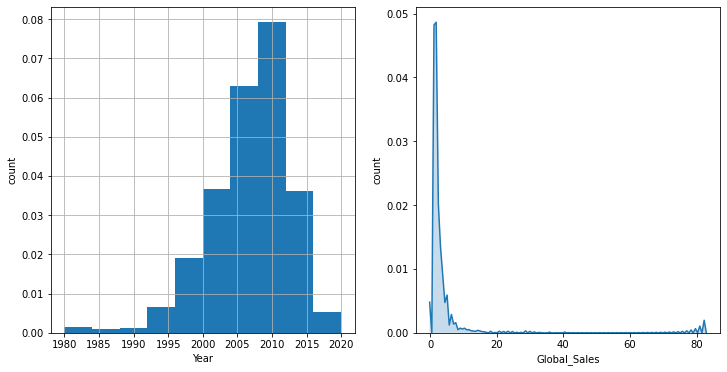

In [6]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
df['Year'].hist(density=True)
plt.ylabel('count')
plt.xlabel('Year')

plt.subplot(122)
sns.kdeplot(df['Global_Sales'], shade=True, legend=False)
plt.ylabel('count')
plt.xlabel('Global_Sales')

plt.show()

Как видим год выпуска игр распределен нормально, а мировые продажи нет 

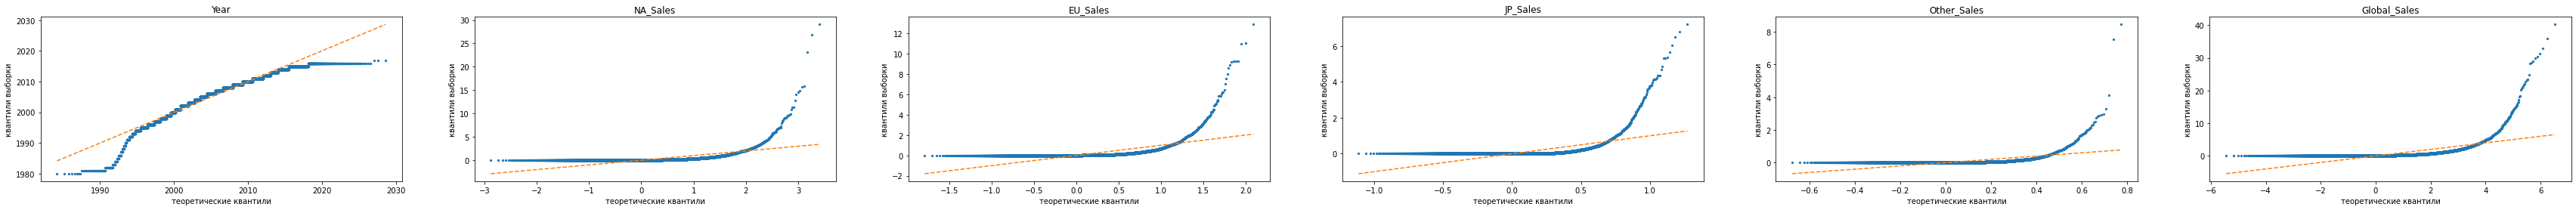

In [7]:
fig, axes = plt.subplots(ncols = len(keys))
fig.set_size_inches(10 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

Построив Q-Q кривую видно что теоретическое значение квантиля на выборке и его реальное значение в данных распределены относительно нормально

In [8]:
for key in keys:
    print(key)
    
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

Year
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.734124593324497
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9706591155560911
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9876491143511267

NA_Sales
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.9515604289673455
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9782503916134474
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.989516809254127

EU_Sales
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.9530063863116038
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9780696469454151
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9871068803470298

JP_Sales
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.9534281238703458
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9763826967104471
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9856609230027714

Other_Sales
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.961139896373057
2 sigm

Оценим нормальность выборок также на основании известных характеристик нормального распределения. В частности:

Если рассчётные цифры оказываются близки к теоретическим, то распределения можно признать нормальными.

Тот факт, что распределения данных значений явлются нормальными или близкими к ним позволяет использовать другие методы для анализа взаимосвязей в данных.

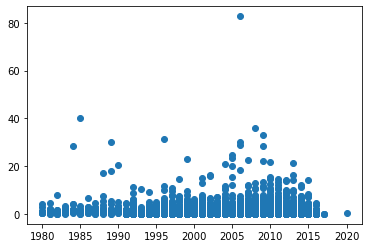

In [9]:
plt.scatter(df['Year'], df['Global_Sales'])
plt.show()

На графике видно что год выпуска и мировые продажи зависимы

In [10]:
ones = np.ones((16598,1))
x_pot = np.hstack((ones, df['Year'].values.reshape(16598,1)))

In [11]:

XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(df['Global_Sales'])
z = x_pot.dot(b)
e = df['Global_Sales'] - z

In [12]:
R = 1 - sum_of_squares(e) / sum_of_squares(np.array(df['Global_Sales']))
R

0.0055510360998782815

Рассчитыаем коэффициенты регрессии и значения для для каждого из значений выборок. Результат расчёт показывает, что регрессия плохо описывает зависимость между данными и корее всего зависимости нет.

In [13]:
n = 16598
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 16596)

In [14]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8420192050271598

In [15]:
F = (R / k1) / ((1 - R) / k2)
F

92.63923887282829

Построим статистический тест с нулевой гипотезой о том, что зависимости между годом выпуска и и мировыми продажами нет.

Не смотря на маленькое значение коэффициента детерминации зависимость есть.

Так как результат расчёта F > t, то зависимость есть.

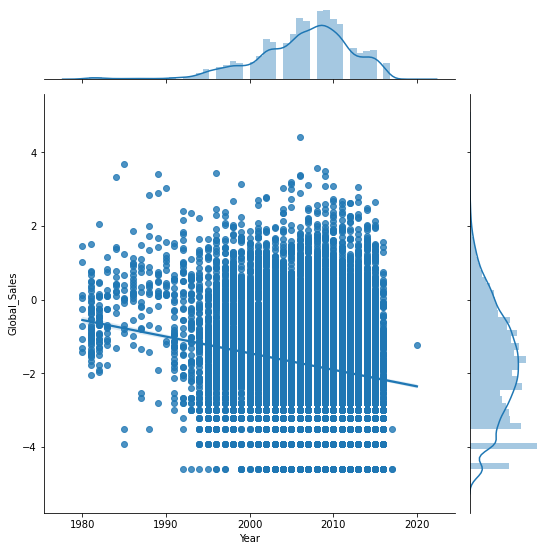

In [16]:
grid = sns.jointplot(df['Year'], np.log(df['Global_Sales']), kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)
plt.show()

Визуализировав графики , видно что действительно зависимость есть 

In [17]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Проведём анализ зависимостей методом кореляции Кендала в данных 

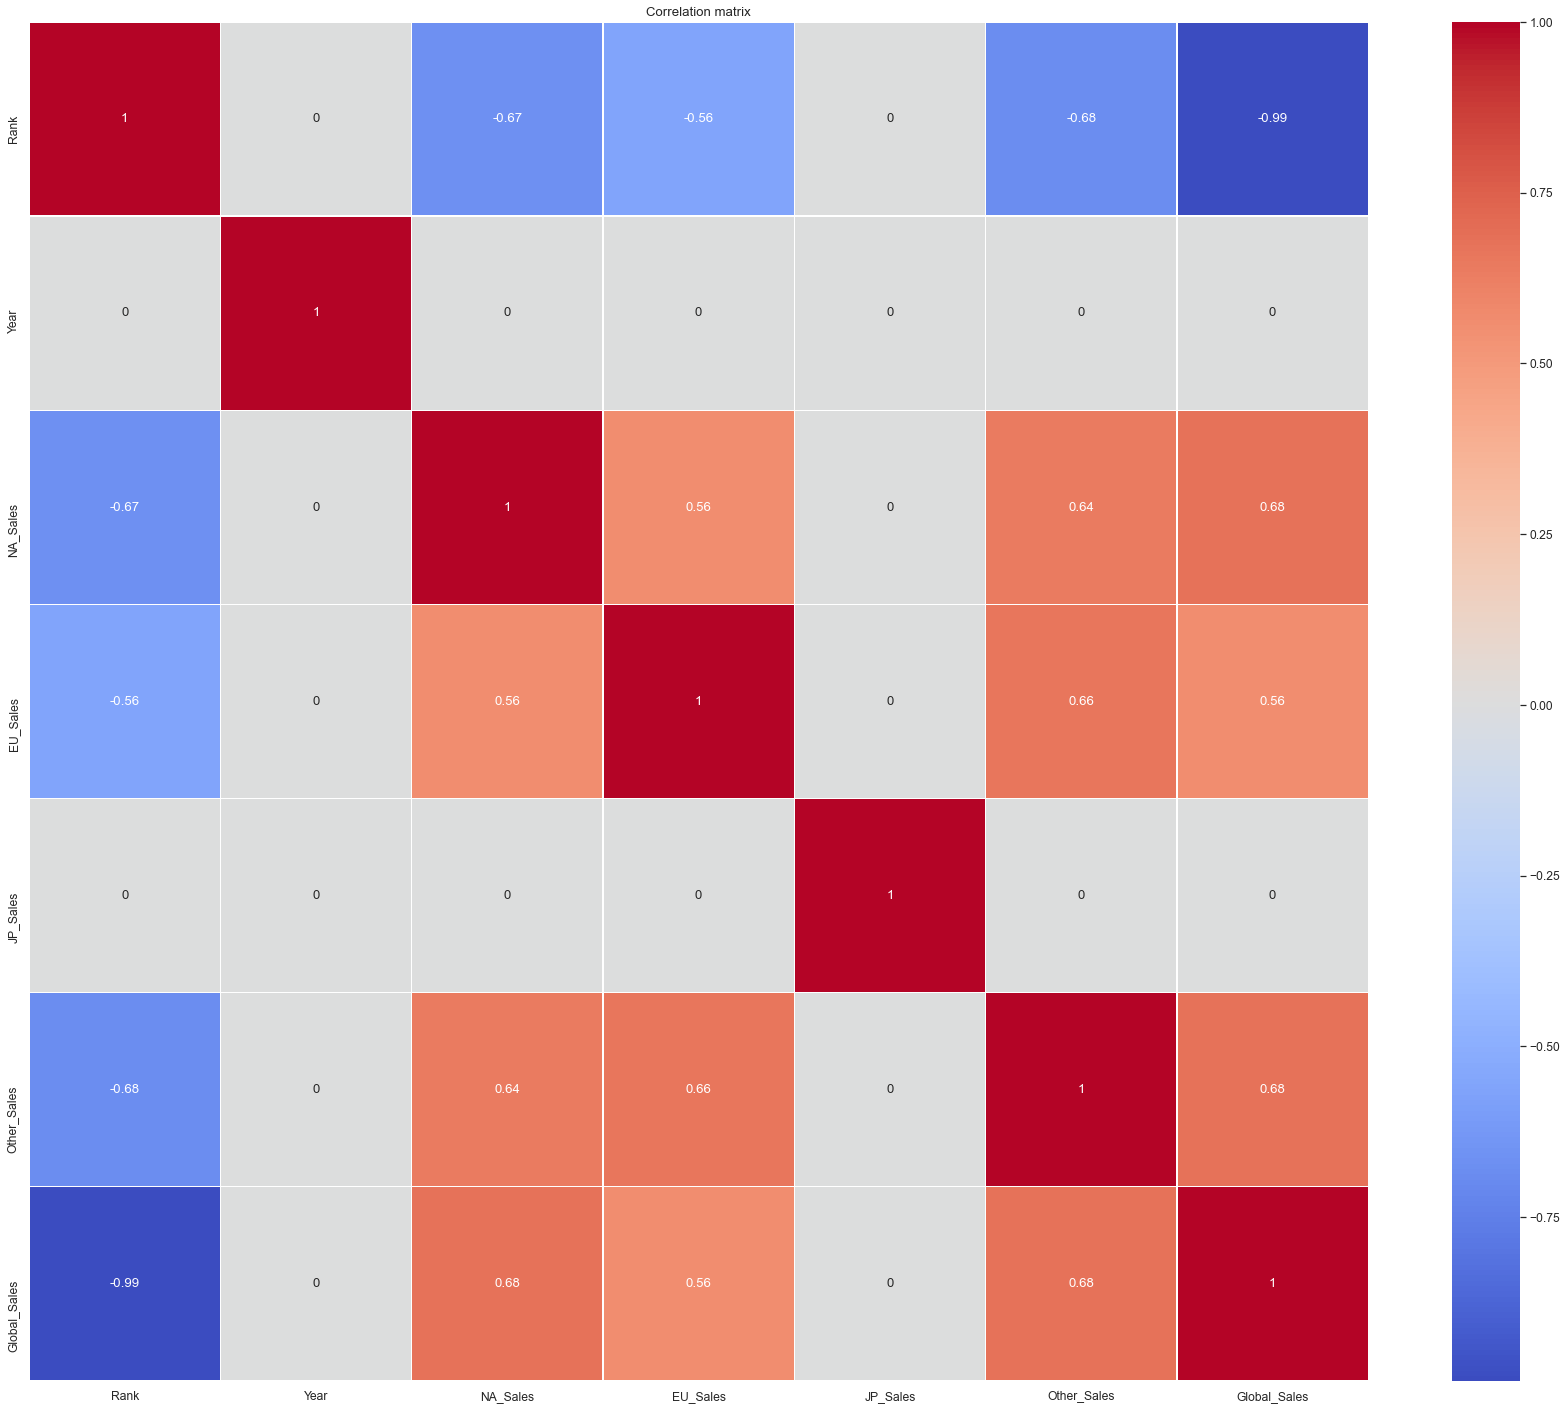

In [18]:
plt.figure(figsize = (30,25))

sns.set(font_scale=1.1)

corr_matrix = df.corr(method='kendall')
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.3, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()


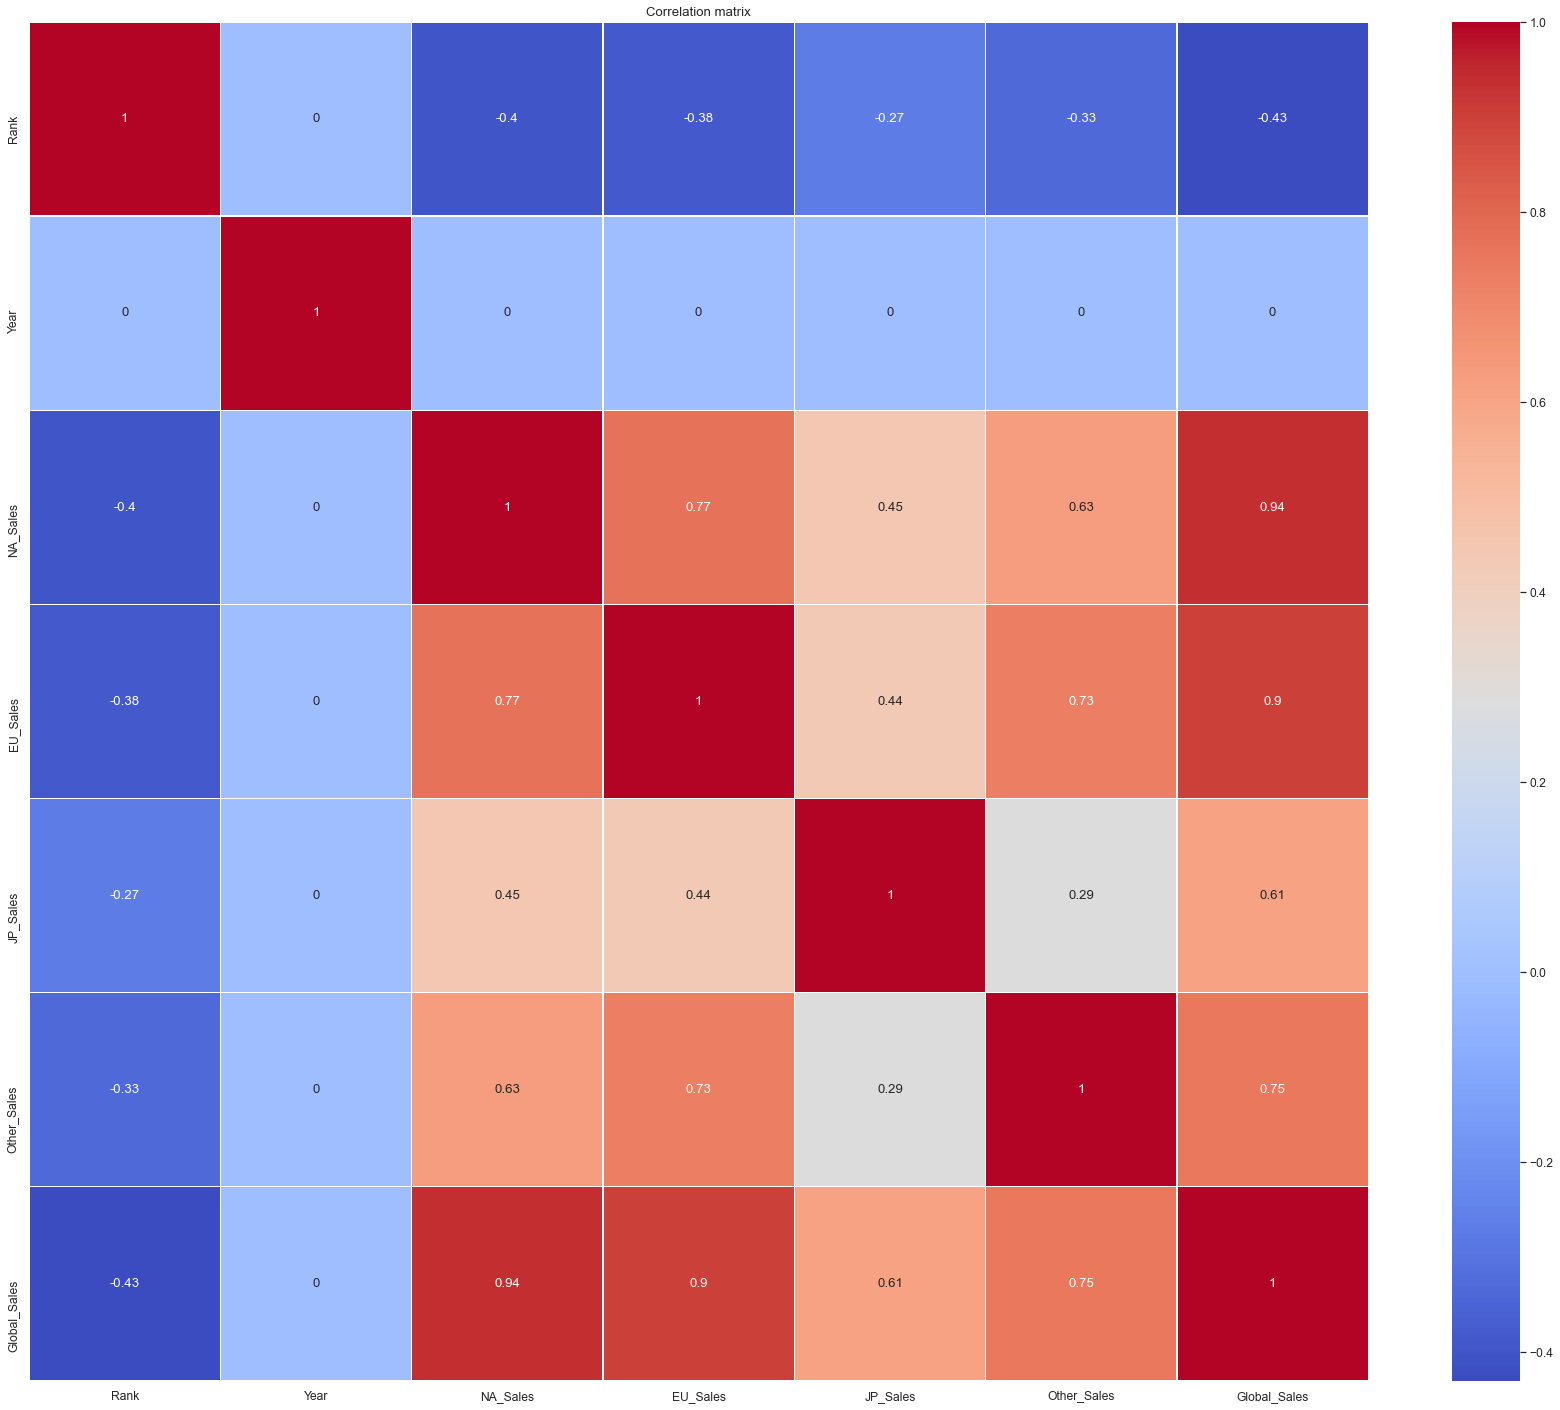

In [19]:
plt.figure(figsize = (30,25))

sns.set(font_scale=1.1)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.3, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()


In [22]:
df['grouped_platform_year'] = df.groupby(by=['Platform'], as_index=False)['Year'].transform(lambda s: np.median(s.values))

df['grouped_genre_year'] = df.groupby(by=['Genre'], as_index=False)['Year'].transform(lambda s: np.median(s.values))

df['grouped_Genre'] = df.groupby(by=['Genre'], as_index=False)['Global_Sales'].transform(lambda s: np.median(s.values))

df['grouped_Genre_jp'] = df.groupby(by=['Genre'], as_index=False)['JP_Sales'].transform(lambda s: np.median(s.values))

df['grouped_Genre_na'] = df.groupby(by=['Genre'], as_index=False)['NA_Sales'].transform(lambda s: np.median(s.values))

df['grouped_Genre_eu'] = df.groupby(by=['Genre'], as_index=False)['EU_Sales'].transform(lambda s: np.median(s.values))

df['grouped_Genre_other'] = df.groupby(by=['Genre'], as_index=False)['Other_Sales'].transform(lambda s: np.median(s.values))

df['grouped_platform_gl'] = df.groupby(by=['Platform'], as_index=False)['Global_Sales'].transform(lambda s: np.median(s.values))

df['grouped_platform_jp'] = df.groupby(by=['Platform'], as_index=False)['JP_Sales'].transform(lambda s: np.median(s.values))

df['grouped_platform_na'] = df.groupby(by=['Platform'], as_index=False)['NA_Sales'].transform(lambda s: np.median(s.values))

df['grouped_platform_eu'] = df.groupby(by=['Platform'], as_index=False)['EU_Sales'].transform(lambda s: np.median(s.values))

df['grouped_platform_other'] = df.groupby(by=['Platform'], as_index=False)['Other_Sales'].transform(lambda s: np.median(s.values))

#sns.distplot(df.groupby('grouped_platform')['Rank'].nunique())
#df.head()

Построим матрицу корелляции , и сгруппируем информацию о продажах в зависимости от платформы , жанра.

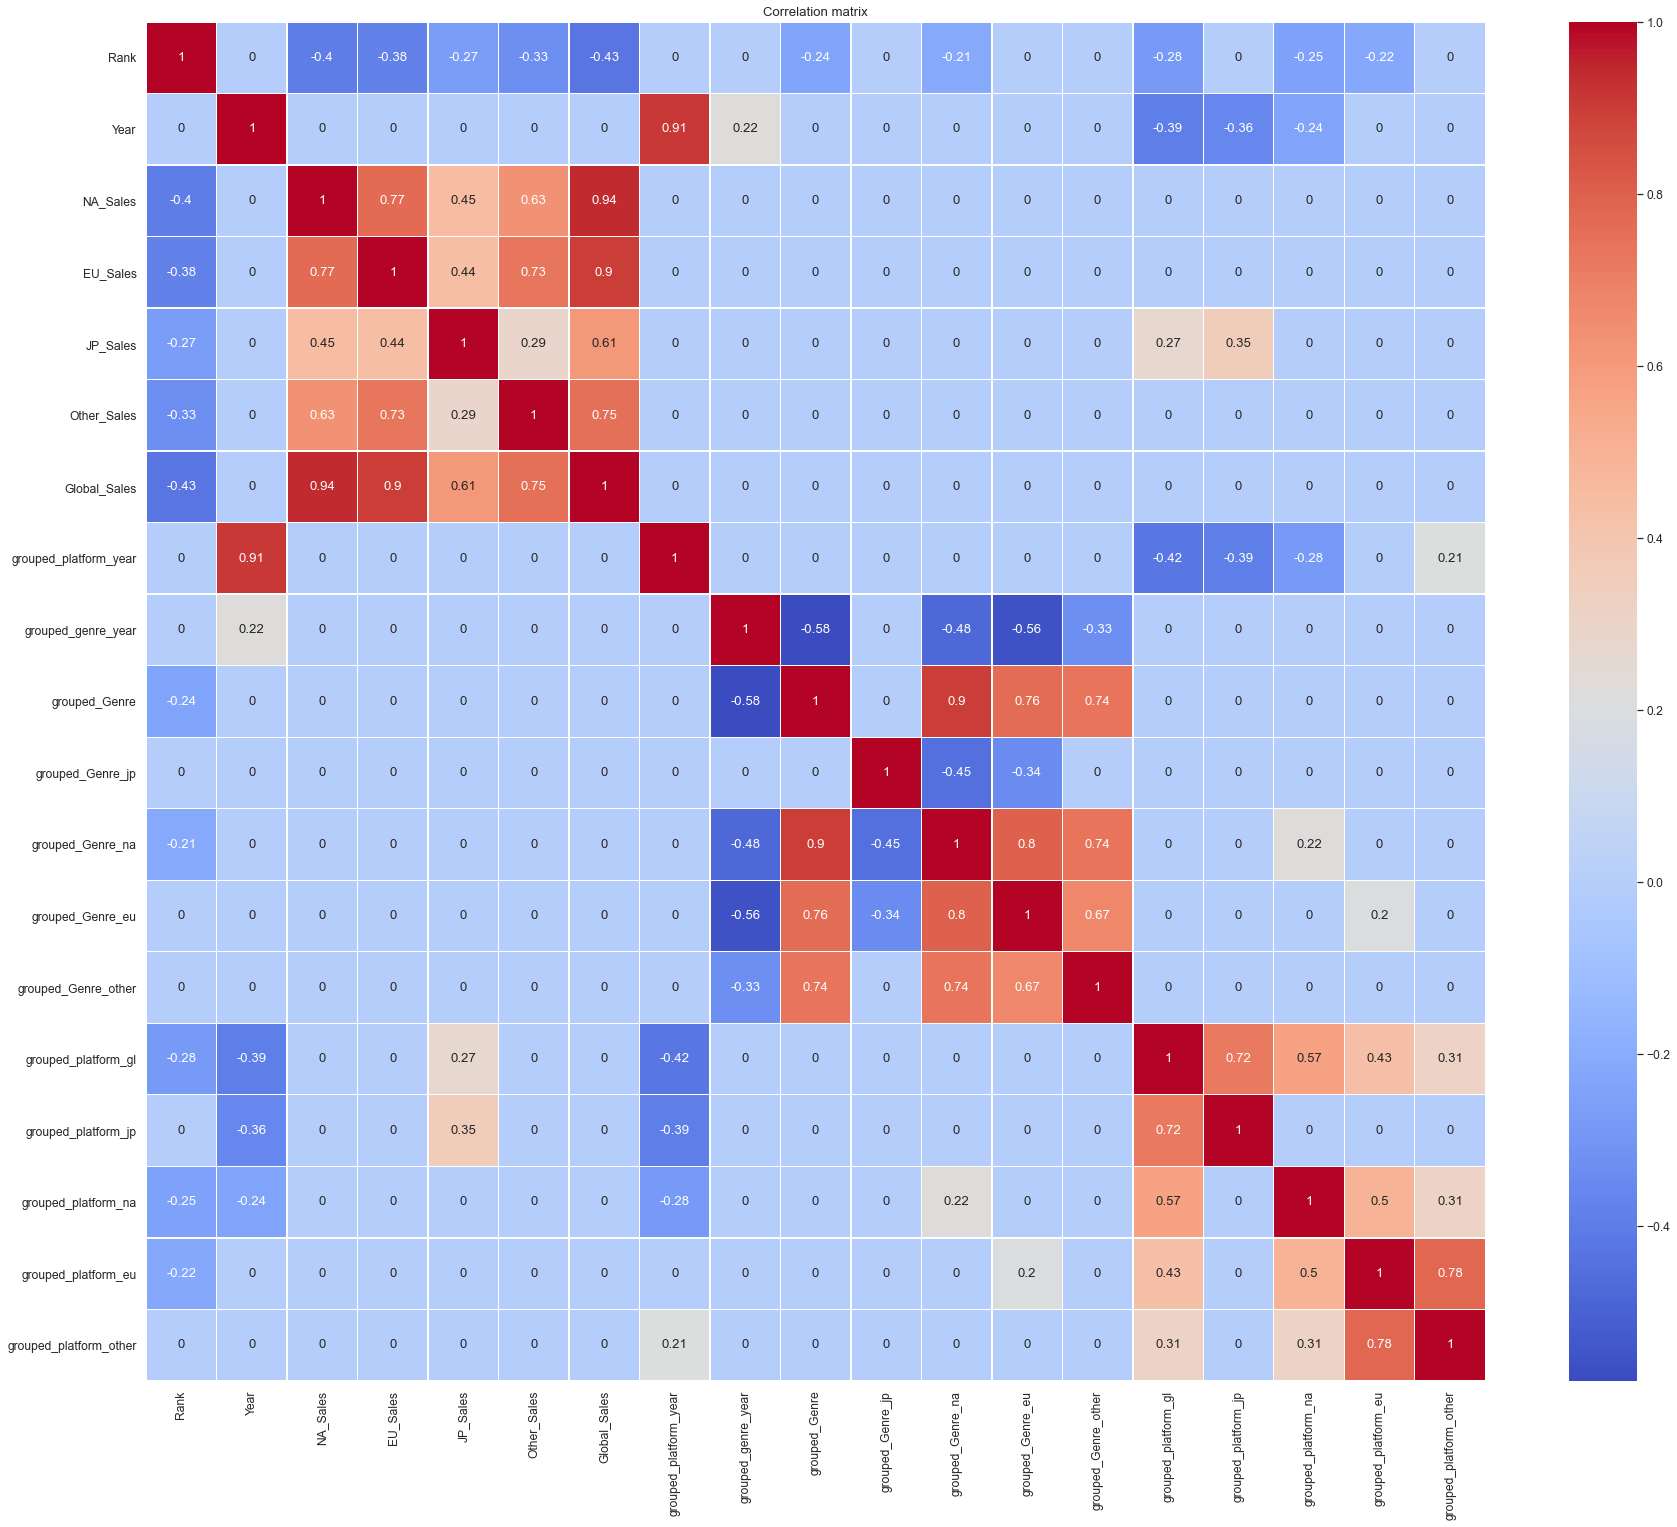

In [21]:
plt.figure(figsize = (30,25))

sns.set(font_scale=1.1)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.3, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Вывод

Продажи зависят от региона и платформы на которой выходит игра. Но сильно это видно только в японском регионе , предпочтение в жанрах и платформах в других регионах не сильно отличается. Так же видно что очень большое количество игр продается маленькими тиражами. 